In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

### Loading Data

In [3]:
listings = pd.read_csv('/Users/saurabh/Documents/PythonData/listings.csv')

In [88]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,958,"Bright, Modern Garden Unit - 1BR/1B",1169,Holly,NaN,Western Addition,37.769310,-122.433856,Entire home/apt,170,1,127,2018-02-26,1.21,1,106
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.745112,-122.421018,Entire home/apt,235,30,112,2017-08-06,1.04,1,365
2,7918,A Friendly Room - UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.766690,-122.452505,Private room,65,32,17,2016-11-21,0.16,7,365
3,8014,Newly Remodeled room in big house WIFI market,22402,Jia,NaN,Outer Mission,37.730746,-122.448409,Private room,60,3,76,2018-02-16,1.12,3,37
4,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.764872,-122.451828,Private room,65,32,7,2017-08-12,0.16,7,365


In [5]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4804 entries, 0 to 4803
Data columns (total 16 columns):
id                                4804 non-null int64
name                              4804 non-null object
host_id                           4804 non-null int64
host_name                         4776 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     4804 non-null object
latitude                          4804 non-null float64
longitude                         4804 non-null float64
room_type                         4804 non-null object
price                             4804 non-null int64
minimum_nights                    4804 non-null int64
number_of_reviews                 4804 non-null int64
last_review                       4396 non-null object
reviews_per_month                 4381 non-null float64
calculated_host_listings_count    4804 non-null int64
availability_365                  4804 non-null int64
dtypes: float64(4),

In [6]:
listings.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.804000e+03,4.804000e+03,0.0,4804.000000,4804.000000,4804.000000,4.804000e+03,4804.000000,4381.000000,4804.000000,4804.000000
mean,1.125361e+07,3.357978e+07,NaN,37.763546,-122.432606,222.415903,2.082392e+04,49.912781,2.351408,3.766861,137.558493
std,7.709818e+06,4.601828e+07,NaN,0.022875,0.026804,375.445072,1.442775e+06,68.268786,3.304190,8.083173,124.338291
min,9.580000e+02,4.600000e+01,NaN,37.704783,-122.511500,0.000000,1.000000e+00,0.000000,0.020000,1.000000,0.000000
25%,3.812677e+06,3.052907e+06,NaN,37.748104,-122.445195,100.000000,1.000000e+00,6.000000,0.600000,1.000000,26.000000
50%,1.090908e+07,1.133110e+07,NaN,37.763194,-122.428219,150.000000,2.000000e+00,23.000000,1.610000,1.000000,89.000000
75%,1.855375e+07,4.414355e+07,NaN,37.781353,-122.412448,250.000000,4.000000e+00,66.000000,3.330000,3.000000,254.250000
max,2.359468e+07,1.762662e+08,NaN,37.810306,-122.370427,10000.000000,1.000000e+08,568.000000,110.080000,53.000000,365.000000


In [12]:
listings_temp = listings
listings_temp.dropna()
listings_temp.head()
listings_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4804 entries, 0 to 4803
Data columns (total 16 columns):
id                                4804 non-null int64
name                              4804 non-null object
host_id                           4804 non-null int64
host_name                         4776 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     4804 non-null object
latitude                          4804 non-null float64
longitude                         4804 non-null float64
room_type                         4804 non-null object
price                             4804 non-null int64
minimum_nights                    4804 non-null int64
number_of_reviews                 4804 non-null int64
last_review                       4396 non-null object
reviews_per_month                 4381 non-null float64
calculated_host_listings_count    4804 non-null int64
availability_365                  4804 non-null int64
dtypes: float64(4),

### Exploring Data

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


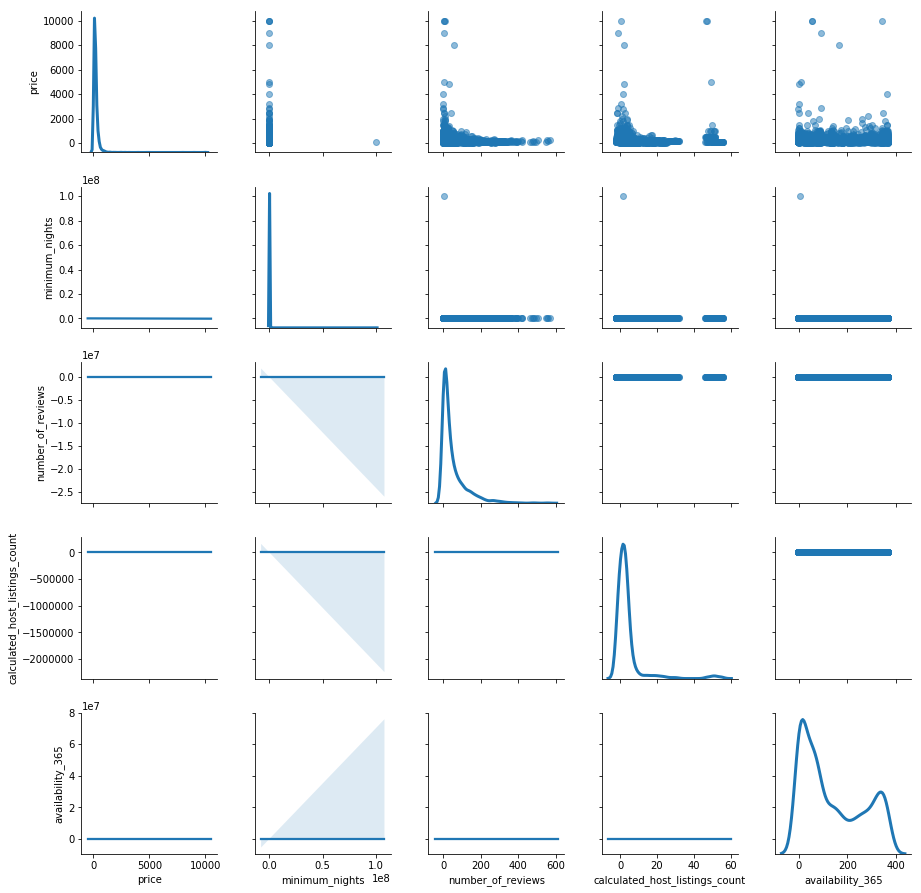

In [31]:
# Take a subset of the data to make plots clearer.
listings_temp_sample = listings_temp.loc[:,['room_type','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']]

# Make a copy of the data to add jitter to and plot.
df_jittered = listings_temp_sample.loc[:, 'price':'availability_365'].dropna()
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-3, 3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                                   price  minimum_nights  number_of_reviews  \
price                           1.000000       -0.005934          -0.114084   
minimum_nights                 -0.005934        1.000000          -0.008861   
number_of_reviews              -0.114084       -0.008861           1.000000   
calculated_host_listings_count  0.049920       -0.004940          -0.103225   
availability_365               -0.006479       -0.015964           0.151887   

                                calculated_host_listings_count  \
price                                                 0.049920   
minimum_nights                                       -0.004940   
number_of_reviews                                    -0.103225   
calculated_host_listings_count                        1.000000   
availability_365                                     -0.077294   

                                availability_365  
price                                  -0.006479  
minimum_nights            

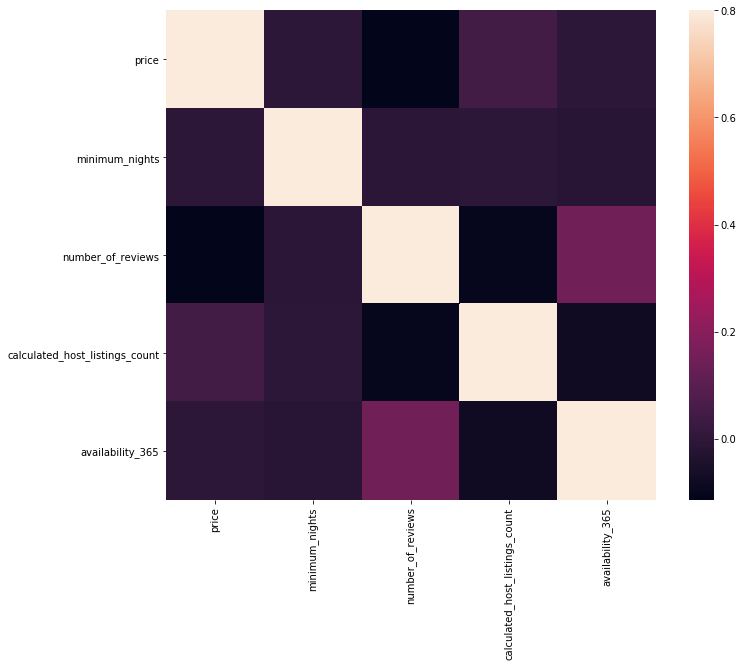

In [32]:
# Make the correlation matrix.
corrmat = listings_temp_sample.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.


/usr/local/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


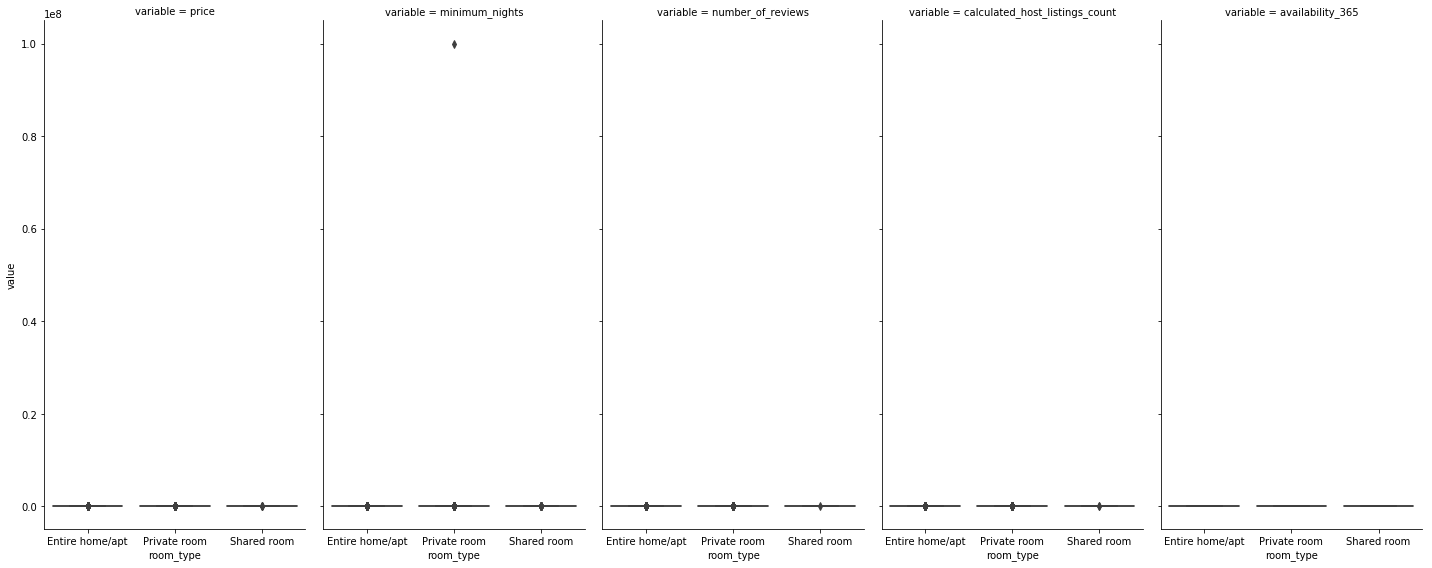

                availability_365                                            \
                           count        mean         std  min   25%    50%   
room_type                                                                    
Entire home/apt           2763.0  128.499457  121.266451  0.0  19.0   84.0   
Private room              1946.0  150.465057  128.219787  0.0  36.0  102.5   
Shared room                 95.0  136.652632  108.681437  0.0  43.5  126.0   

                               calculated_host_listings_count             \
                    75%    max                          count       mean   
room_type                                                                  
Entire home/apt  234.50  365.0                         2763.0   2.673905   
Private room     278.75  365.0                         1946.0   4.969681   
Shared room      179.00  365.0                           95.0  10.915789   

                  ...    number_of_reviews          price              \
 

In [92]:
# Plot all the variables with boxplots for each country.

# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = listings_temp_sample
df_long = pd.melt(df_long, id_vars=['room_type'])

g = sns.FacetGrid(df_long, col="variable", size=8, aspect=.5)
g = g.map(sns.boxplot, "room_type", "value")
plt.show()

# Descriptive statistics by group.
print(listings_temp_sample.groupby('room_type').describe())

# Test whether group differences are significant.
for col in listings_temp_sample.loc[:,'price':'availability_365'].columns:
    print(col)
    print(stats.ttest_ind(
        listings_temp_sample[listings_temp_sample['room_type'] == 'Entire home/apt'][col].dropna(),
        listings_temp_sample[listings_temp_sample['room_type'] == 'Private room'][col].dropna()
    ))

After judging the boxplots, 'minimum_nights' variable has some potential outlier for room type 'Private room' that we should keep eye on. All three room types appear similar for all the variables measured 

### Feature Engineering 

In [43]:
features = pd.get_dummies(listings_temp['room_type'])

features['personal_space'] = np.where((listings_temp['room_type'].isin(['Entire home/apt', 'Private room'])), 1, 0)

print(pd.crosstab(features['personal_space'], listings_temp['room_type']))

room_type       Entire home/apt  Private room  Shared room
personal_space                                            
0                             0             0           95
1                          2763          1946            0


As we are looking for room types we can look for rooms with privacy and above feature is great way to include

In [44]:
features['Available_365days'] = np.where(listings_temp['availability_365']>=365, 1, 0)

# Check to make sure it worked.
print(listings_temp['availability_365'].groupby(features['Available_365days']).describe())

                    count        mean         std    min    25%    50%    75%  \
Available_365days                                                               
0                  4679.0  131.482368  120.224495    0.0   25.0   86.0  240.0   
1                   125.0  365.000000    0.000000  365.0  365.0  365.0  365.0   

                     max  
Available_365days         
0                  364.0  
1                  365.0  


As we are lloking for checking availability of certain listings throughout year then above feature is good to include

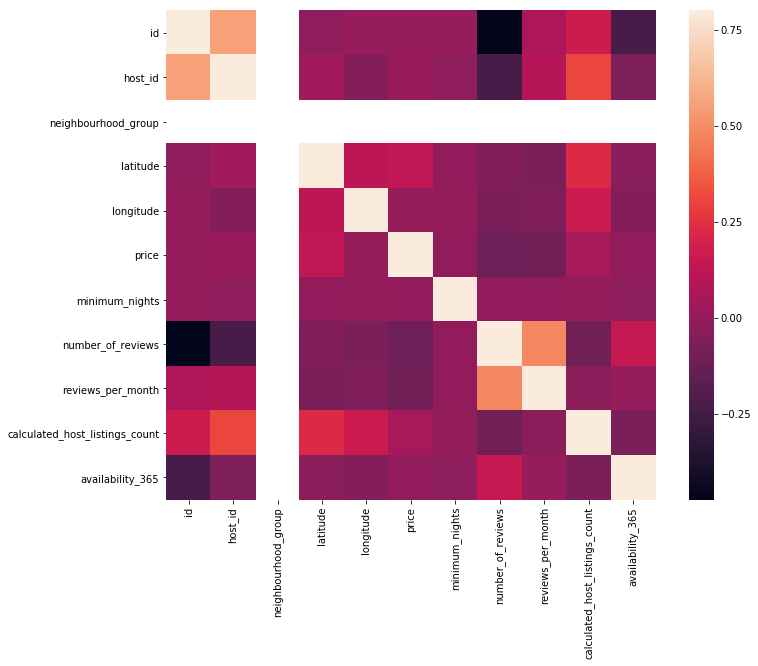

                        price  minimum_nights  number_of_reviews  \
price                1.000000       -0.005934          -0.114084   
minimum_nights      -0.005934        1.000000          -0.008861   
number_of_reviews   -0.114084       -0.008861           1.000000   
price_nights_review  0.531399        0.594941           0.529632   

                     price_nights_review  
price                           0.531399  
minimum_nights                  0.594941  
number_of_reviews               0.529632  
price_nights_review             1.000000  


In [47]:
corrmat = listings_temp.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


means = listings_temp[['price','minimum_nights','number_of_reviews']].mean(axis=0)
stds = listings_temp[['price','minimum_nights','number_of_reviews']].std(axis=0)
features['price_nights_review'] = ((listings_temp[['price','minimum_nights','number_of_reviews']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = listings_temp.loc[:, ['price', 'minimum_nights', 'number_of_reviews']]
plotdf['price_nights_review'] = features['price_nights_review'] 
corrmat2 = plotdf.corr()

print(corrmat2)

After analysing magnitude of correlation matrix, it looks like price_nights_review term might be a useful feature to include.

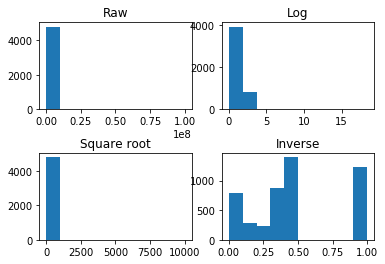

In [71]:
# Making a four-panel plot.
fig = plt.figure()
fig.subplots_adjust(hspace=.5)

fig.add_subplot(221)
plt.hist(listings_temp['minimum_nights'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(listings_temp['minimum_nights'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(listings_temp['minimum_nights'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/listings_temp['minimum_nights'].dropna())
plt.title('Inverse')
plt.show()

# None of these transformations look particularly great, actually. But let's
# make a feature from the log one.

features['log_minimum_nights'] = np.log(listings_temp['minimum_nights'])

non-normal variables can sometimes be transformed into normally-distributed features using transformations such as taking the square root, the inverse, or the log of the variable but above analysis shows may not good feature to include

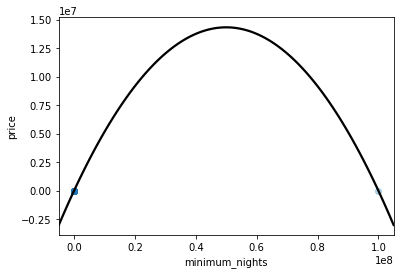

In [72]:
sns.regplot(
    listings_temp['minimum_nights'],
    y=listings_temp['price'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['minimum_nights_squared'] = listings_temp['minimum_nights'] * listings_temp['minimum_nights']

To capture non-linearity while keeping the model happy, it can be helpful to create quadratic or higher-level features by squaring, cubing, or otherwise multiplying a variable by itself.If we want to include a variable that has a non-linear component to its relationship with the outcome. minimum_nights_squared is good feature to include

In [84]:
features['Price_1000plus'] = np.where(listings_temp['price']>=1000, 1, 0)

# Check to make sure it worked.
print(listings_temp['price'].groupby(features['Price_1000plus']).describe())

                 count         mean          std     min     25%     50%  \
Price_1000plus                                                             
0               4751.0   197.818354   147.137599     0.0   100.0   150.0   
1                 53.0  2427.377358  2455.912146  1000.0  1100.0  1450.0   

                   75%      max  
Price_1000plus                   
0                249.5    995.0  
1               2450.0  10000.0  


As we are looking for listings whos price is above 1000 so above feature is useful to include

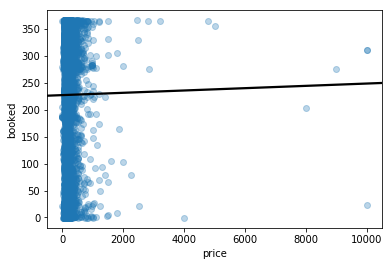

In [76]:
features['booked'] = max(listings_temp['availability_365']) - listings_temp['availability_365']

sns.regplot(
    listings_temp['price'],
    features['booked'],
    x_jitter=.49,
    y_jitter=.49,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.xlabel('price')
plt.ylabel('booked')
plt.show()

as we are looking for how bookings are affecting price this feature is nice to include

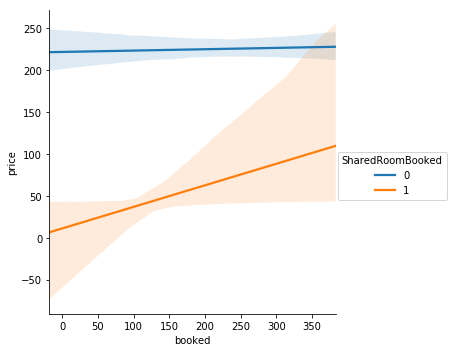

In [89]:
# Create a better indicator for 'room types been booked
features['SharedRoomBooked'] = np.where(listings_temp['room_type'] == 'Shared room', 1, 0)

# Create the interaction.
features['Room_Booked'] = features['booked'] * features['SharedRoomBooked']

# A plot of an interaction.
# Add the 'tvtot' feature to the features data frame for plotting.
features['price'] = listings_temp['price']
sns.lmplot(
    x='booked',
    y='price',
    hue='SharedRoomBooked',
    data=features,
    scatter=False
)
plt.show()

It looks like booking increased if rooms are shared among different people also prices increased as bookings increased so this interaction term might be a useful feature to include. 

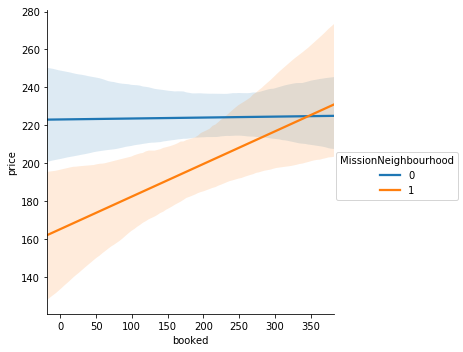

In [90]:
# Create a better indicator for 'room types been affected
features['MissionNeighbourhood'] = np.where(listings_temp['neighbourhood'] == 'Mission', 1, 0)

# Create the interaction.
features['Room_Booked_at_Mission'] = features['booked'] * features['MissionNeighbourhood']

# A plot of an interaction.
# Add the 'tvtot' feature to the features data frame for plotting.
features['price'] = listings_temp['price']
sns.lmplot(
    x='booked',
    y='price',
    hue='MissionNeighbourhood',
    data=features,
    scatter=False
)
plt.show()

As we can see Mission neighbourhood has linear increase in rooms booked and price may be its more popular so it looks like this feature is good thing to include

In [91]:
print(features.head())

   Entire home/apt  Private room  Shared room  personal_space  \
0                1             0            0               1   
1                1             0            0               1   
2                0             1            0               1   
3                0             1            0               1   
4                0             1            0               1   

   Available_365days  price_nights_review  log_price  log_minimum_nights  \
0                  0             0.325043   5.135798            0.000000   
1                  1             0.309519   5.459586            3.401197   
2                  1            -0.305265   4.174387            3.465736   
3                  0            -0.021634   4.094345            1.098612   
4                  1            -0.354092   4.174387            3.465736   

   minimum_nights_squared  booked  PrivateRoomBooked  Room_Booked  price  \
0                       1     259                  0            0    170   


### Filtering methods to select the five best features  

1. personal_space  => As this feature will help us to find out weather demand for shared room is more or Private and Entire home/apt
2. Available_365days  => As this feature will help us to find out what are the listings available throughout year
3. booked  => As this feature will help us to evaluate how many days the rooms were fully booked and where is the business of airbnb is more
4. Price_1000plus  => As this feature will help us to find out where the listings are costly means above 1000
5. price_nights_review  => As this feature will help us find out how price, minimum number of nights and review for particular listing are related while consider growth of airbnb business